In [2]:
pip install textblob nltk rouge-score

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install rouge-score

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install transformers==4.23.0

Defaulting to user installation because normal site-packages is not writeable
  Using cached transformers-4.23.0-py3-none-any.whl.metadata (88 kB)
  Using cached tokenizers-0.13.3.tar.gz (314 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached transformers-4.23.0-py3-none-any.whl (5.3 MB)
Failed to build tokenizers
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [49 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-312\tokenizers
      copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers
      creating build\lib.win-amd64-cpython-312\tokenizers\models
      copying py_src\tokenizers\models\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\models
      creating build\lib.win-amd64-cpython-312\tokenizers\decoders
      copying py_src\tokenizers\decoders\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\decoders
      creating build\lib.win-amd64-cpython-312\tokenizers\normalizers
      copying py_src\tokenizers\normalizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\normalizers
      creating build\lib.win-amd64-cpython-312\tokenizers\pre_tokenizers
      copying py_src

In [5]:
pip install sentencepiece==0.1.96

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached sentencepiece-0.1.96.tar.gz (508 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for sentencepiece
Failed to build sentencepiece


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      c:\ProgramData\anaconda3\Lib\site-packages\setuptools\dist.py:452: SetuptoolsDeprecationWarning: Invalid dash-separated options
      !!
      
              ********************************************************************************
              Usage of dash-separated 'description-file' will not be supported in future
              versions. Please use the underscore name 'description_file' instead.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid build errors in the future.
      
              See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
              ********************************************************************************
      
      !!
        opt = self.warn_dash_deprecation(opt, section)
      c:\

Importing Necessary Libraries

Import libraries for data manipulation, machine learning models, visualization, and text processing.

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import (
    DistilBertTokenizer, DistilBertForSequenceClassification,
    Trainer, TrainingArguments
)
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.translate.bleu_score import sentence_bleu
from sklearn.decomposition import PCA
from tqdm import tqdm

In [10]:
# Load datasets
dataset1 = pd.read_csv("1429_1.csv")
dataset2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
dataset3 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")


C:\Users\mehak\AppData\Local\Temp\ipykernel_11108\639289798.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset1 = pd.read_csv("1429_1.csv")


In [11]:
# Combine datasets
data = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)


In [12]:
# Data Cleaning
data = data.drop_duplicates()
data = data.dropna(subset=['reviews.text'])
data['reviews.text'] = data['reviews.text'].str.strip()
data['reviews.text'] = data['reviews.text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)


Using TextBlob to assign sentiment labels ('positive', 'neutral', or 'negative') to each review based on its polarity.

In [13]:
# Sentiment Analysis with TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['reviews.text'].apply(get_sentiment)

In [31]:
# Display the first few rows of the dataset with the new 'sentiment' column
print(data[['reviews.text', 'sentiment']].head(10))

                                        reviews.text sentiment
0  This product so far has not disappointed My ch...  positive
1  great for beginner or experienced person Bough...  positive
2  Inexpensive tablet for him to use and learn on...  positive
3  Ive had my Fire HD  two weeks now and I love i...  positive
4  I bought this for my grand daughter when she c...  positive
5  This amazon fire  inch tablet is the perfect s...  positive
6  Great for ereading on the go nice and light we...  positive
7  I gave this as a Christmas gift to my inlaws h...  positive
8  Great as a device to read books I like that it...  positive
9  I love ordering books and reading them with th...  positive


Data Preparation for Machine Learning
Splitting data into features (X) and labels (y), followed by a train-test split.
Also encoding sentiment labels into numeric values: positive=2, neutral=1, negative=0.


In [14]:
# Sentiment Evaluation
X = data['reviews.text']
y = data['sentiment']


In [15]:
# Encode sentiments
y = y.map({'positive': 2, 'neutral': 1, 'negative': 0})

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Text Vectorization
 Converting the textual data into numeric representations using TF-IDF (Term Frequency-Inverse Document Frequency).


In [17]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Logistic Regression Model

Training a Logistic Regression model and evaluating its performance.
Logistic Regression Evaluation
Computing metrics (accuracy, precision, recall, F1-score) for Logistic Regression.
Displaying a confusion matrix to visualize the classification performance.


In [18]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)

y_pred_lr = lr_model.predict(X_test_vec)

In [19]:
# Evaluation Metrics for Logistic Regression
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Evaluation:
Accuracy: 0.9520349550787962
Precision: 0.9504918800515185
Recall: 0.9520349550787962
F1-Score: 0.9473221372374198
Confusion Matrix:
 [[  615    82   496]
 [    8  1103   306]
 [   48    37 17674]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.52      0.66      1193
           1       0.90      0.78      0.84      1417
           2       0.96      1.00      0.98     17759

    accuracy                           0.95     20369
   macro avg       0.93      0.76      0.82     20369
weighted avg       0.95      0.95      0.95     20369



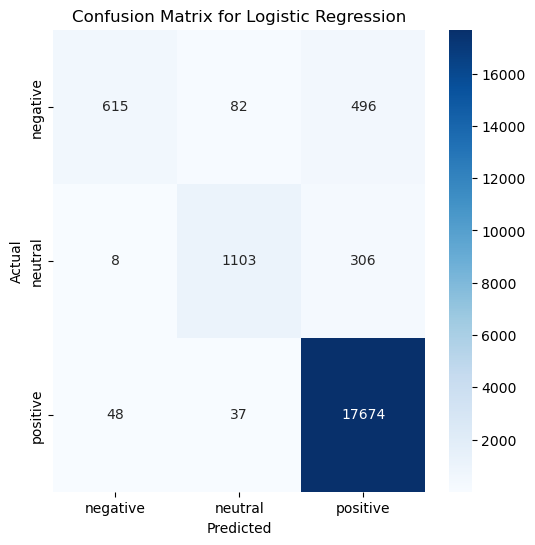

In [20]:
# Confusion Matrix Plot for Logistic Regression
plt.figure(figsize=(6, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_lr),
    annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"]
)
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Naive Bayes Model

Training a Naive Bayes model and evaluating its performance.
Naive Bayes Evaluation
Computing metrics (accuracy, precision, recall, F1-score) for Naive Bayes.
Displaying a confusion matrix to visualize the classification performance.


In [21]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

y_pred_nb = nb_model.predict(X_test_vec)

In [22]:
# Evaluation Metrics for Naive Bayes
print("Naive Bayes Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Evaluation:
Accuracy: 0.8750061367764741
Precision: 0.8788972755931748
Recall: 0.8750061367764741
F1-Score: 0.8202871641182569
Confusion Matrix:
 [[   52     1  1140]
 [    2    19  1396]
 [    7     0 17752]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.04      0.08      1193
           1       0.95      0.01      0.03      1417
           2       0.88      1.00      0.93     17759

    accuracy                           0.88     20369
   macro avg       0.89      0.35      0.35     20369
weighted avg       0.88      0.88      0.82     20369



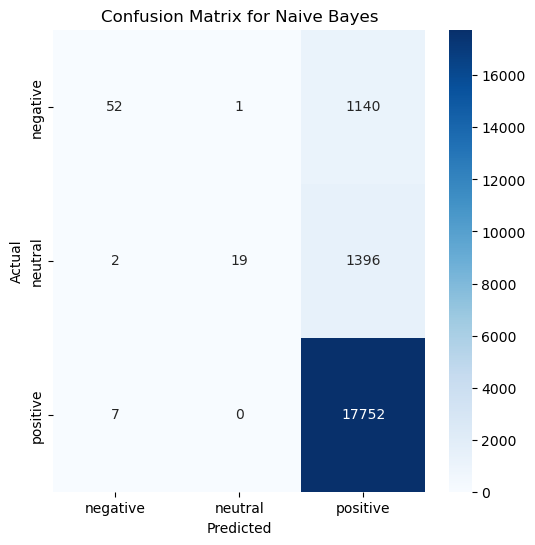

In [23]:
# Confusion Matrix Plot for Naive Bayes
plt.figure(figsize=(6, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_nb),
    annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"]
)
plt.title("Confusion Matrix for Naive Bayes")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

KMeans Clustering

Using PCA to reduce dimensionality for visualization.
Clustering reviews into 3 groups using KMeans and visualizing them in a 2D space.


In [24]:
# KMeans Clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_vec.toarray())

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

Exception in thread Thread-15 (_readerthread):
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 3: invalid start byte
c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals

KMeans(n_clusters=3, random_state=42)

In [25]:
# Assign clusters to data
data['cluster'] = kmeans.predict(pca.transform(vectorizer.transform(data['reviews.text']).toarray()))


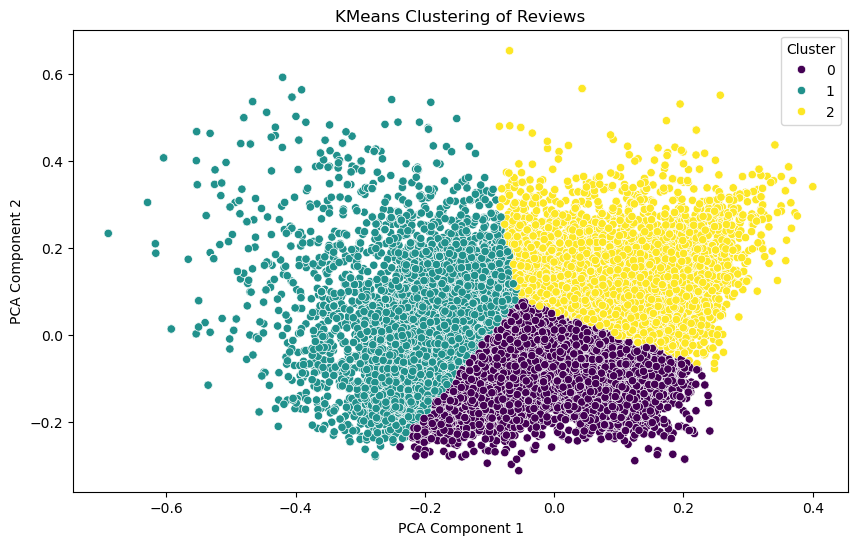

In [26]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title("KMeans Clustering of Reviews")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

Fine-Tuning DistilBERT

Using M-shot prompting and fine-tuning DistilBERT for sentiment classification.


In [27]:
# M-shot Prompting for DistilBERT
def m_shot_prompt(reviews, num_examples=5):
    example_prompts = [
        ("This product is great, I loved it!", "positive"),
        ("The product was okay, not what I expected.", "neutral"),
        ("Very poor quality, I would not recommend.", "negative"),
        ("Excellent value for the price, very satisfied.", "positive"),
        ("Not bad, does the job but could be better.", "neutral")
    ]
    
    prompt = "\n".join([f"Review: {ex[0]} => Sentiment: {ex[1]}" for ex in example_prompts[:num_examples]])
    prompt += "\n\n"
    prompt += f"Review: {reviews} => Sentiment: "
    
    return prompt

In [28]:
# Load DistilBERT Model and Tokenizer for Sentiment Classification
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
# Summarize Reviews for Each Cluster
def summarize_cluster(reviews, method="m-shot", tokenizer=None, model=None, max_length=50):
    """
    Summarize reviews for a given cluster.
    
    Parameters:
    - reviews (list): List of reviews in the cluster.
    - method (str): Method to use for summarization ("m-shot" or "distilbert").
    - tokenizer: Tokenizer for the DistilBERT model.
    - model: Pre-trained DistilBERT model.
    - max_length (int): Maximum length of the summary.
    
    Returns:
    - summary (str): Generated summary.
    """
    combined_reviews = " ".join(reviews)
    
    if method == "m-shot":
        # Use M-shot prompting
        prompt = m_shot_prompt(combined_reviews[:512])  # Truncate to 512 characters for large input
        # For demonstration, just return the prompt (a full implementation would involve a generative model)
        return f"Generated M-shot Prompt:\n{prompt}"
    
    elif method == "distilbert":
        # Use DistilBERT for summarization
        inputs = tokenizer.encode_plus(
            combined_reviews[:512],  # Truncate to 512 tokens
            return_tensors="pt",
            max_length=512,
            truncation=True
        )
        outputs = model(**inputs)
        summary = tokenizer.decode(outputs.logits.argmax(dim=-1), skip_special_tokens=True)
        return summary

    return "No valid method selected."

# Generate summaries for each cluster
cluster_summaries = {}
for cluster in data['cluster'].unique():
    cluster_reviews = data[data['cluster'] == cluster]['reviews.text'].tolist()
    # Choose the summarization method: "m-shot" or "distilbert"
    summary = summarize_cluster(cluster_reviews, method="m-shot", tokenizer=tokenizer, model=model)
    cluster_summaries[cluster] = summary

# Display summaries for each cluster
for cluster, summary in cluster_summaries.items():
    print(f"\nCluster {cluster} Summary:\n{summary}")


Cluster 0 Summary:
Generated M-shot Prompt:
Review: This product is great, I loved it! => Sentiment: positive
Review: The product was okay, not what I expected. => Sentiment: neutral
Review: Very poor quality, I would not recommend. => Sentiment: negative
Review: Excellent value for the price, very satisfied. => Sentiment: positive
Review: Not bad, does the job but could be better. => Sentiment: neutral

Review: This product so far has not disappointed My children love to use it and I like the ability to monitor control what content they see with ease Ive had my Fire HD  two weeks now and I love it This tablet is a great valueWe are Prime Members and that is where this tablet SHINES I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a  screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipa => Sentiment: 

Cluster 2 Summary:
Generated M-shot Prompt:
Review: Th

In [29]:
# Tokenize the data for DistilBERT
def tokenize_function(examples):
    return tokenizer(examples['reviews.text'], padding=True, truncation=True)

train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)

train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(y_train.tolist())
)

test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask']),
    torch.tensor(y_test.tolist())
)

In [30]:
# Fine-tune DistilBERT model
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
optimizer = AdamW(model.parameters(), lr=5e-5)

for epoch in range(3):  # Number of epochs
    model.train()
    for batch in tqdm(train_dataloader):
        optimizer.zero_grad()
        input_ids = batch[0]
        attention_mask = batch[1]
        labels = batch[2]
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        
        # Backward pass
        loss.backward()
        optimizer.step()

  2%|▏         | 98/5941 [35:40<35:27:11, 21.84s/it]


KeyboardInterrupt: 

Evaluating DistilBERT

Evaluating the fine-tuned DistilBERT model on the test set.

In [ ]:
# Evaluate DistilBERT model
model.eval()
y_pred_distilbert = []
y_true_distilbert = []
for batch in tqdm(test_dataloader):
    input_ids = batch[0]
    attention_mask = batch[1]
    labels = batch[2]
    
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=-1)
        
    y_pred_distilbert.extend(predictions.tolist())
    y_true_distilbert.extend(labels.tolist())
    

In [ ]:
print("DistilBERT Evaluation:")
print(classification_report(y_true_distilbert, y_pred_distilbert, target_names=['negative', 'neutral', 'positive']))